# Video Game Sales

In [139]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sales_data = pd.read_csv("./vgsales.csv")
sales_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Cleaning

### Check for Duplicate Records

In [140]:
duplicated_rows = sales_data[sales_data.duplicated()]
duplicated_rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### Data doesn't contain any duplicated records

### Check for Missing Values within the data

In [141]:
sales_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

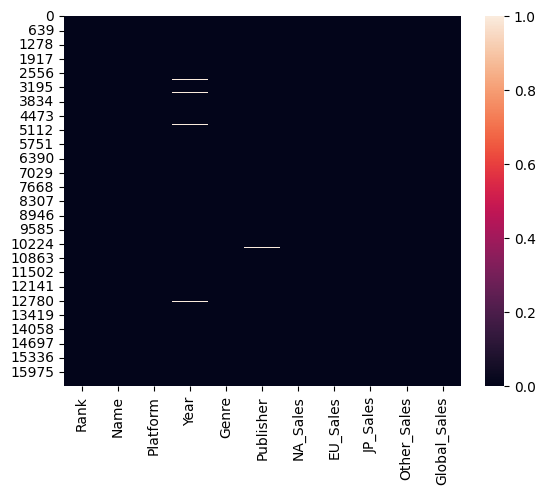

In [142]:
sales_hm = sns.heatmap(sales_data.isnull())

In [143]:
percent_null = (271 / 16598) * 100
print(percent_null)

1.6327268345583803


### Null values for Year are less than 2% so drop the entries

In [144]:
sales_data.dropna(how='any', axis=0, inplace=True)
sales_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Visualization

## Top Ten Publishers by their Total Global Sales

In [154]:
publisher_totals = sales_data.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False)
top_ten = publisher_totals.head(10)
publisher_totals

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Epic Games                        0.01
Paradox Development               0.01
Rain Games                        0.01
Ascaron Entertainment             0.01
Commseed                          0.01
Name: Global_Sales, Length: 576, dtype: float64

<Axes: xlabel='Publisher'>

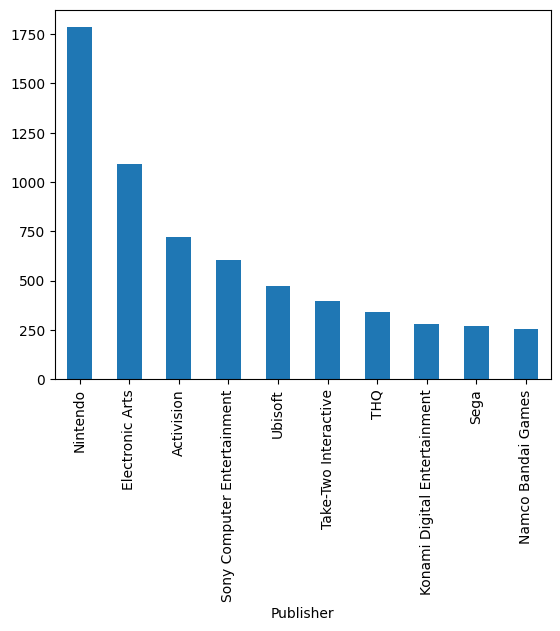

In [155]:
top_ten.plot.bar(x='Publisher', y='Global_Sales')

In [156]:
top_ten_games = pd.DataFrame({'Name':sales_data['Name'], 'Platform':sales_data['Platform'], 'NA_Sales':sales_data['NA_Sales'], 'EU_Sales':sales_data['EU_Sales'], 'JP_Sales':sales_data['JP_Sales'], 'Other_Sales':sales_data['Other_Sales'], 'Global_Sales':sales_data['Global_Sales']})

## Top Ten Game Sales By Region

### North America

<Axes: xlabel='NA_Sales', ylabel='Name'>

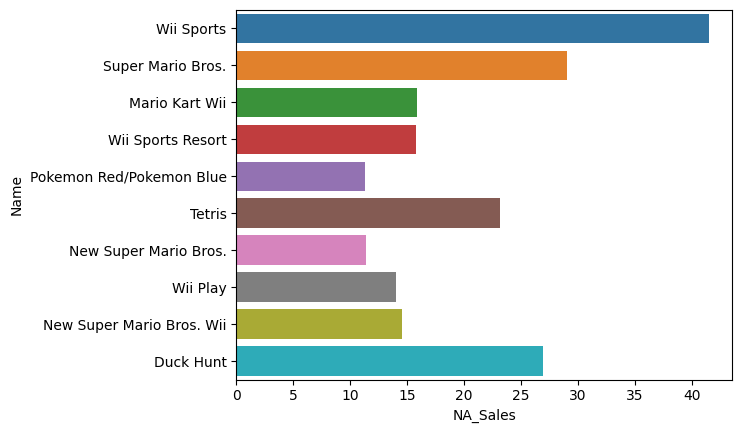

In [157]:
sns.barplot(top_ten_games.head(10), x='NA_Sales', y='Name')

### Europe

<Axes: xlabel='EU_Sales', ylabel='Name'>

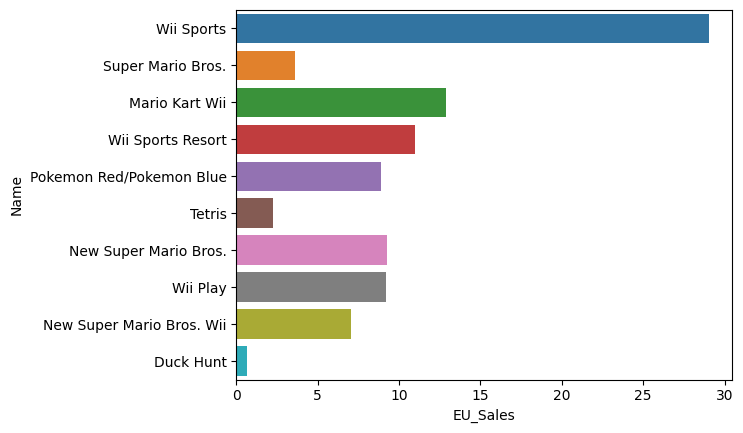

In [158]:
sns.barplot(top_ten_games.head(10), x='EU_Sales', y='Name')

### Japan

<Axes: xlabel='JP_Sales', ylabel='Name'>

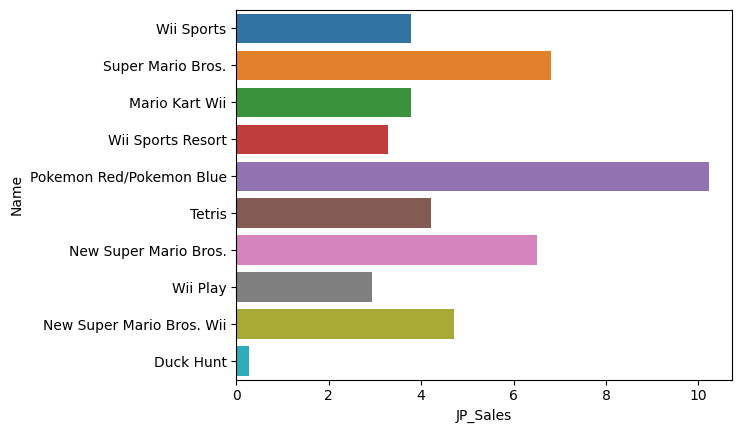

In [159]:
sns.barplot(top_ten_games.head(10), x='JP_Sales', y='Name')

### Rest of The World

<Axes: xlabel='Other_Sales', ylabel='Name'>

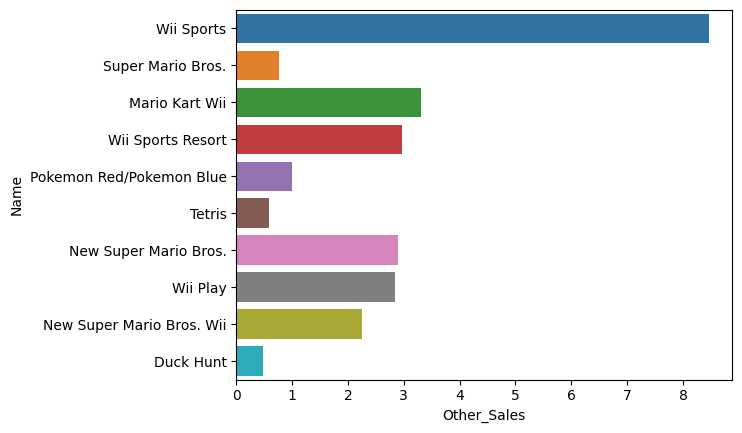

In [164]:
sns.barplot(top_ten_games.head(10), x='Other_Sales', y='Name')

In [161]:
top_ten_games.head(5).plot.bar(x='Name', y=('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'))

KeyError: ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')